# Account-Level Analysis (Hidden Pattern Section)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
merged = pd.read_csv("csv_files/Merged.csv")
merged.head()

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side        Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY  2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY  2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY  2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY  2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Timestamp        Date     timestamp  value  \
0         0.0  ...  1.730000e+12  2024-12-02  1.733117e+09   80.0   
1         0.0  ...  1.730000e+12  2024-12-02  1.733117e+09   80.0   
2         0.0  ...  1.730000e+12  2024-12-02  1.733117e+09   80.0   
3         0.0  ...  1.730000e+12  2024-12-02  1.733117e+09   80.0   
4         0.0  ...  1.730000e+12  2024-12-02  1.733117e+09   80.0   

   classification        date sentiment_score  is_Profitable  abs_pnl  \
0   Extreme Greed  2024-12-02             5.0          False      0.0   
1   Extreme Greed  2024-12-02             5.0          False      0.0   
2   Extreme Greed  2024-12-02             5.0          False      0.0   
3   Extreme Greed  2024-12-02             5.0          False      0.0   
4   Extreme Greed  2024-12-02             5.0          False      0.0   

  trade_direction  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 25 columns]

##### Calculate total PnL per account

In [8]:
account_perf = merged.groupby('Account')['Closed PnL'].sum().reset_index()
account_perf.head()

Account    Closed PnL
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04
2  0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05

##### Identify top and worst traders

In [6]:
top_traders = account_perf.sort_values(by='Closed PnL', ascending=False).head(5) 
worst_traders = account_perf.sort_values(by='Closed PnL', ascending=True).head(5)  

In [11]:
top_traders #top 5

Account    Closed PnL
27  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2.143383e+06
0   0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06
29  0xbaaaf6571ab7d571043ff1e313a9609a10637864  9.401638e+05
13  0x513b8629fe877bb581bf244e326a047b249c4ff1  8.404226e+05
31  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  8.360806e+05

In [12]:
worst_traders # Bottom 5

Account     Closed PnL
19  0x8170715b3b381dffb7062c0298972d4727a0a63b -167621.124781
2   0x271b280974205ca63b716753467d5a371de622ab  -70436.191318
5   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  -31203.599986
6   0x39cef799f8b69da1995852eea189df24eb5cae3c   14456.919336
18  0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f   14900.443047

##### Merge back with original data to analyze sentiment behavior

In [22]:
top_data = merged[merged['Account'].isin(top_traders['Account'])]
worst_data = merged[merged['Account'].isin(worst_traders['Account'])]

In [24]:
top_data.head()

Account  Coin  Execution Price  \
1993  0x513b8629fe877bb581bf244e326a047b249c4ff1  @107           12.409   
1994  0x513b8629fe877bb581bf244e326a047b249c4ff1  @107           12.410   
1995  0x513b8629fe877bb581bf244e326a047b249c4ff1  @107           12.422   
1996  0x513b8629fe877bb581bf244e326a047b249c4ff1  @107           12.423   
1997  0x513b8629fe877bb581bf244e326a047b249c4ff1  @107           12.426   

      Size Tokens  Size USD Side        Timestamp IST  Start Position  \
1993         5.00     62.05  BUY  2024-12-09 21:24:00        0.000000   
1994        62.15    771.28  BUY  2024-12-09 21:24:00        4.998320   
1995        38.00    472.04  BUY  2024-12-09 21:24:00       67.127438   
1996       158.50   1969.05  BUY  2024-12-09 21:24:00      105.114670   
1997        42.18    524.13  BUY  2024-12-09 21:24:00      263.561414   

     Direction  Closed PnL  ...     Timestamp        Date     timestamp  \
1993       Buy         0.0  ...  1.730000e+12  2024-12-09  1.733722e+09   
1994       Buy         0.0  ...  1.730000e+12  2024-12-09  1.733722e+09   
1995       Buy         0.0  ...  1.730000e+12  2024-12-09  1.733722e+09   
1996       Buy         0.0  ...  1.730000e+12  2024-12-09  1.733722e+09   
1997       Buy         0.0  ...  1.730000e+12  2024-12-09  1.733722e+09   

      value  classification        date sentiment_score  is_Profitable  \
1993   78.0   Extreme Greed  2024-12-09             5.0          False   
1994   78.0   Extreme Greed  2024-12-09             5.0          False   
1995   78.0   Extreme Greed  2024-12-09             5.0          False   
1996   78.0   Extreme Greed  2024-12-09             5.0          False   
1997   78.0   Extreme Greed  2024-12-09             5.0          False   

      abs_pnl trade_direction  
1993      0.0               1  
1994      0.0               1  
1995      0.0               1  
1996      0.0               1  
1997      0.0               1  

[5 rows x 25 columns]

In [26]:
worst_data.head()

Account Coin  Execution Price  \
83769  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1897.9   
83770  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1897.9   
83771  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1898.6   
83772  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  BTC          46130.0   
83773  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  BTC          46134.0   

       Size Tokens  Size USD Side        Timestamp IST  Start Position  \
83769      0.09670    183.53  BUY  2023-05-01 01:06:00         0.00000   
83770      0.08240    156.39  BUY  2023-05-01 01:06:00         0.09670   
83771      0.07220    137.08  BUY  2023-05-01 01:06:00         0.17910   
83772      0.03375   1556.89  BUY  2024-01-11 13:28:00         0.00000   
83773      0.96625  44576.98  BUY  2024-01-11 13:28:00         0.03375   

       Direction  Closed PnL  ...     Timestamp        Date     timestamp  \
83769  Open Long         0.0  ...  1.680000e+12  2023-05-01  1.682919e+09   
83770  Open Long         0.0  ...  1.680000e+12  2023-05-01  1.682919e+09   
83771  Open Long         0.0  ...  1.680000e+12  2023-05-01  1.682919e+09   
83772  Open Long         0.0  ...  1.700000e+12  2024-01-11  1.704951e+09   
83773  Open Long         0.0  ...  1.700000e+12  2024-01-11  1.704951e+09   

       value  classification        date sentiment_score  is_Profitable  \
83769   63.0           Greed  2023-05-01             4.0          False   
83770   63.0           Greed  2023-05-01             4.0          False   
83771   63.0           Greed  2023-05-01             4.0          False   
83772   76.0   Extreme Greed  2024-01-11             5.0          False   
83773   76.0   Extreme Greed  2024-01-11             5.0          False   

       abs_pnl trade_direction  
83769      0.0               1  
83770      0.0               1  
83771      0.0               1  
83772      0.0               1  
83773      0.0               1  

[5 rows x 25 columns]

##### Calculate average PnL per sentiment for top vs worst traders

In [28]:
top_sentiment = top_data.groupby('sentiment_score')['Closed PnL'].mean().reset_index()
worst_sentiment = worst_data.groupby('sentiment_score')['Closed PnL'].mean().reset_index()

In [29]:
top_sentiment.head()

sentiment_score  Closed PnL
0              1.0   62.338821
1              2.0   33.124011
2              3.0   52.784746
3              4.0   71.707179
4              5.0  161.929305

In [30]:
worst_sentiment.head()

sentiment_score  Closed PnL
0              1.0   40.732352
1              2.0  -27.075463
2              3.0   19.396830
3              4.0 -182.829432
4              5.0   76.745147

### Plot for comparison

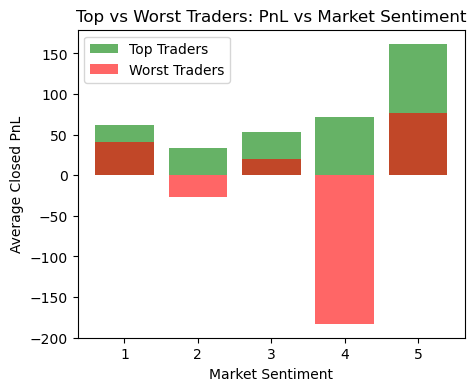

In [33]:
plt.figure(figsize=(5,4))

plt.bar(top_sentiment['sentiment_score'], top_sentiment['Closed PnL'], alpha=0.6, label='Top Traders', color='green')
plt.bar(worst_sentiment['sentiment_score'], worst_sentiment['Closed PnL'], alpha=0.6, label='Worst Traders', color='red')

plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.title('Top vs Worst Traders: PnL vs Market Sentiment')
plt.legend()
plt.show()